In [ ]:
## Step 4: Data Visualization

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
import holoviews as hv
import geoviews as gv

In [2]:
# Import API key
from config import geoapify_key
geoapify_key

'61af9cc886364e8cb0382e25ca72cc9f'

In [3]:
csv_file_path = '../Project_1/output_data/chargers_output.csv'
chargers_df = pd.read_csv(csv_file_path)
chargers_df

,name,near,Address,Lat,Lng,Charging Speed
0,Electrify America Charging Station,"Bothell, WA, USA","14003 NE Woodinville Duvall Rd, Woodinville, W...",47.754139,-122.151152,Very fast
1,bp pulse Charging Station,"Bothell, WA, USA","13023 NE 175th St, Woodinville, WA 98072",47.754105,-122.166144,Very fast
2,Tesla Supercharger,"Bothell, WA, USA","19128 112th Ave NE, Bothell, WA 98011",47.767526,-122.191578,Fast
3,ChargePoint Charging Station,"Bothell, WA, USA","18231 110th Ave NE, Bothell, WA 98011",47.759647,-122.193886,Slow
4,EVgo Charging Station,"Bothell, WA, USA","3000 196th St SW, Lynnwood, WA 98036",47.820570,-122.273570,Fast
...,...,...,...,...,...,...
412,Blink Charging Station,"Seattle, WA, USA","1530 Belmont Ave, Seattle, WA 98122",47.614840,-122.324167,Slow
413,Blink Charging Station,"Seattle, WA, USA","Union Station, 505 5th Ave S, Seattle, WA 98104",47.597516,-122.327673,Slow
414,Loop Charging Station,"Seattle, WA, USA",US,47.617690,-122.330590,Slow
415,Blink Charging Station,"Seattle, WA, USA","1220 Howell St, Seattle, WA 98101",47.617493,-122.330225,Not Applicable


In [4]:
city_bellevue = chargers_df[(chargers_df['near'] == 'Bellevue, WA, USA')]
city_bellevue

,name,near,Address,Lat,Lng,Charging Speed
259,EVgo Charging Station,"Bellevue, WA, USA","888 116th Ave NE, Bellevue, WA 98004",47.618936,-122.184163,Super fast
260,Electrify America Charging Station,"Bellevue, WA, USA","300 Bellevue Way NE, Bellevue, WA 98004",47.613019,-122.200470,Very fast
261,ChargePoint Charging Station,"Bellevue, WA, USA","600 Bellevue Square, Bellevue, WA 98004",47.615796,-122.205579,Slow
262,Tesla Supercharger,"Bellevue, WA, USA","10333 NE 1st St, Bellevue, WA 98004",47.611048,-122.202181,Fast
263,EVgo Charging Station,"Bellevue, WA, USA","2041 148th Ave NE, Bellevue, WA 98007",47.628025,-122.143753,Super fast
...,...,...,...,...,...,...
339,Blink Charging Station,"Bellevue, WA, USA","13035 SE 26th St, Bellevue, WA 98005",47.587216,-122.165142,Medium
340,Fast Charging Station,"Bellevue, WA, USA","Bellefield Building, 1309 114th Ave SE, Bellev...",47.598937,-122.189179,Not Applicable
341,Shell Recharge Charging Station,"Bellevue, WA, USA","12903 NE 20th St, Bellevue, WA 98005",47.627697,-122.167891,Not Applicable
342,Volta Charging Station,"Bellevue, WA, USA","Bellevue, WA 98006",47.578661,-122.170444,Slow


In [5]:
# Plot is Map_plot showing bellevue chargers
map_plot_1 = city_bellevue.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    hover = ["Address"],
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Bellevue"
)

# Display the map plot

map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name)

In [6]:
city_bothell = chargers_df[(chargers_df['near'] == 'Bothell, WA, USA')]
city_bothell

,name,near,Address,Lat,Lng,Charging Speed
0,Electrify America Charging Station,"Bothell, WA, USA","14003 NE Woodinville Duvall Rd, Woodinville, W...",47.754139,-122.151152,Very fast
1,bp pulse Charging Station,"Bothell, WA, USA","13023 NE 175th St, Woodinville, WA 98072",47.754105,-122.166144,Very fast
2,Tesla Supercharger,"Bothell, WA, USA","19128 112th Ave NE, Bothell, WA 98011",47.767526,-122.191578,Fast
3,ChargePoint Charging Station,"Bothell, WA, USA","18231 110th Ave NE, Bothell, WA 98011",47.759647,-122.193886,Slow
4,EVgo Charging Station,"Bothell, WA, USA","3000 196th St SW, Lynnwood, WA 98036",47.820570,-122.273570,Fast
...,...,...,...,...,...,...
84,Blink Charging Station,"Bothell, WA, USA","3611 NE 155th St, Lake Forest Park, WA 98155",47.740732,-122.290141,Slow
85,Volta Charging Station,"Bothell, WA, USA","8234 NE 84th St, Kirkland, WA 98033",47.678727,-122.174031,Slow
86,Pacific Electric Vehicle Technologies,"Bothell, WA, USA","2201 192nd St SE, Bothell, WA 98012",47.826359,-122.203304,Not Applicable
87,Volta Charging Station,"Bothell, WA, USA","Lynnwood, WA 98037",47.831176,-122.273708,Not Applicable


In [7]:
# Plot is Map_plot showing bothell chargers
map_plot_2 = city_bothell.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Bothell"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name)

In [8]:
city_vancouver = chargers_df[(chargers_df['near'] == 'Vancouver, WA, USA')]
city_vancouver

,name,near,Address,Lat,Lng,Charging Speed
89,ChargePoint Charging Station,"Vancouver, WA, USA","850 Officers Row, Vancouver, WA 98661",45.629460,-122.663366,Fast
90,Electrify America Charging Station,"Vancouver, WA, USA","7809 NE Vancouver Plaza Dr, Vancouver, WA 98663",45.649943,-122.593315,Very fast
91,Electric Vehicle Charging Station,"Vancouver, WA, USA","4715 N Lagoon Ave, Portland, OR 97217",45.557316,-122.702974,Very fast
92,Blink Charging Station,"Vancouver, WA, USA","1300 Franklin St, Vancouver, WA 98660",45.632357,-122.678211,Slow
93,EVgo Charging Station,"Vancouver, WA, USA","2170 NW Raleigh St, Portland, OR 97210",45.533890,-122.695460,Fast
...,...,...,...,...,...,...
166,OpConnect Charging Station,"Vancouver, WA, USA","2929 N Kerby Ave, Portland, OR 97227",45.544010,-122.672090,Slow
167,OpConnect Charging Station,"Vancouver, WA, USA","2227 River Plaza Dr, Portland, OR 95833",45.549801,-122.693393,Not Applicable
168,OpConnect Charging Station,"Vancouver, WA, USA","62723 NE Killingsworth St, Portland, OR 97218",45.565390,-122.592841,Slow
169,OpConnect Charging Station,"Vancouver, WA, USA","4145 NE Cully Blvd, Portland, OR 97218",45.553085,-122.603334,Slow


In [9]:
# Plot is Map_plot showing vancouver chargers
map_plot_3 = city_vancouver.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Vancouver"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name)

In [10]:
city_redmond = chargers_df[(chargers_df['near'] == 'Redmond, WA, USA')]
city_redmond

,name,near,Address,Lat,Lng,Charging Speed
171,EVgo Charging Station,"Redmond, WA, USA","7525 166th Ave NE, Redmond, WA 98052",47.671370,-122.119490,Fast
172,Electrify America Charging Station,"Redmond, WA, USA","NE 76th St, Redmond, WA 98052",47.671850,-122.104499,Very fast
173,FLO Charging Station,"Redmond, WA, USA","7597 170th Ave NE, Redmond, WA 98052",47.670465,-122.114889,Fast
174,ChargePoint Charging Station,"Redmond, WA, USA","15670 NE 85th St, Redmond, WA 98052",47.679298,-122.129969,Slow
175,Tesla Destination Charger,"Redmond, WA, USA","7401 164th Ave NE, Redmond, WA 98052",47.671225,-122.122192,Slow
...,...,...,...,...,...,...
254,Electric Vehicle Charging Station,"Redmond, WA, USA","787 6th St South, Kirkland, WA 98033",47.669109,-122.197836,Not Applicable
255,Shell Recharge Charging Station,"Redmond, WA, USA","12543 NE 23rd Pl, Bellevue, WA 98005",47.631195,-122.172574,Not Applicable
256,Electric Vehicle Charging Station,"Redmond, WA, USA","14216 140th Pl NE, Kirkland, WA 98034",47.730055,-122.151270,Not Applicable
257,Blink Charging Station,"Redmond, WA, USA","1407 116th Ave NE, Bellevue, WA 98004",47.622965,-122.185899,Not Applicable


In [25]:
# Plot is Map_plot showing redmond chargers
map_plot_4 = city_redmond.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in Redmond",
    hover_cols = "all"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [12]:
city_seattle = chargers_df[(chargers_df['near'] == 'Seattle, WA, USA')]
city_seattle


,name,near,Address,Lat,Lng,Charging Speed
344,EVgo Charging Station,"Seattle, WA, USA","1001 Broadway, Seattle, WA 98122",47.611511,-122.321083,Fast
345,ChargePoint Charging Station,"Seattle, WA, USA","338 Weller St Bridge, Seattle, WA 98134",47.597361,-122.330456,Fast
346,Shell Recharge Charging Station,"Seattle, WA, USA","56 Seneca St, Seattle, WA 98101",47.605599,-122.338900,Fast
347,Tesla Supercharger,"Seattle, WA, USA","601 Union St, Seattle, WA 98101",47.610026,-122.332075,Fast
348,Blink Charging Station,"Seattle, WA, USA","925 4th Ave, Seattle, WA 98104",47.605581,-122.333448,Slow
...,...,...,...,...,...,...
412,Blink Charging Station,"Seattle, WA, USA","1530 Belmont Ave, Seattle, WA 98122",47.614840,-122.324167,Slow
413,Blink Charging Station,"Seattle, WA, USA","Union Station, 505 5th Ave S, Seattle, WA 98104",47.597516,-122.327673,Slow
414,Loop Charging Station,"Seattle, WA, USA",US,47.617690,-122.330590,Slow
415,Blink Charging Station,"Seattle, WA, USA","1220 Howell St, Seattle, WA 98101",47.617493,-122.330225,Not Applicable


In [24]:
# Plot is Map_plot showing seattle chargers
map_plot_5 = city_seattle.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "name",
    xlabel = "Longitude",
    ylabel = "Latitude",
    title = "Charging stations in seattle",
    hover_cols = "all"
)

# Display the map plot
map_plot_5


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (name,index,near,Address,Charging Speed)

In [26]:
# Calulate Ratio Car: Charger
total_cars = np.array([5176, 5599, 5796, 8075, 26932])
                      
chargers = np.array([85, 89, 88, 73, 82])

Ratio = chargers / total_cars
Ratio

array([0.01642195, 0.0158957 , 0.01518288, 0.00904025, 0.00304471])

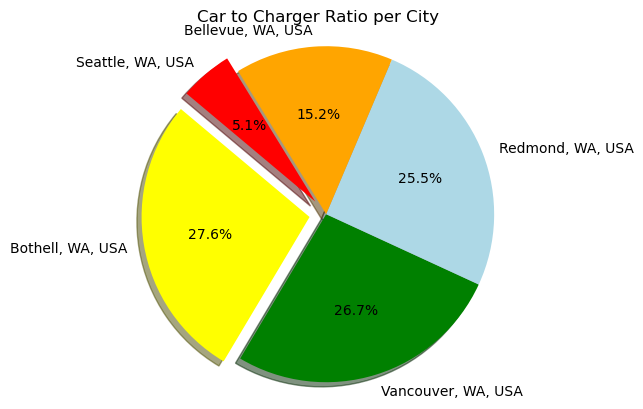

In [27]:
# Tell matplotlib to create a pie chart based upon the above data

cities = ['Bothell, WA, USA', 'Vancouver, WA, USA', 'Redmond, WA, USA', 'Bellevue, WA, USA', 'Seattle, WA, USA']
colors = ["yellow","green","lightblue","orange","red"]
explode = (0.1,0,0,0,0.1)

plt.pie(Ratio, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Car to Charger Ratio per City")

# Save an image of our chart and print the final product to the screen
plt.savefig("output_data/Car to Charger Ratio per city.png")
plt.show()

In [ ]:
# Build scatter plot for city vs. max car
City = df["City"]
carCount = df["VIN (1-10)"]
Fig1 = plt.scatter(City, carCount, edgecolors="black", linewidths=1, alpha=0.8)
# Incorporate the other graph properties
plt.title(f"City vs. Carcount")
plt.xlabel("Cities")
plt.ylabel("CarCounts")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

In [ ]:
#pip install holoviews